In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ser import SER

# Build a random adjacency matrix (weighted and directed)
n_nodes = 50
adj_mat = np.random.uniform(low=1, high=2, size=(n_nodes, n_nodes))
adj_mat[np.eye(n_nodes, dtype=bool)] = 0   # make main diag zero

mask = np.logical_not(np.eye(n_nodes))

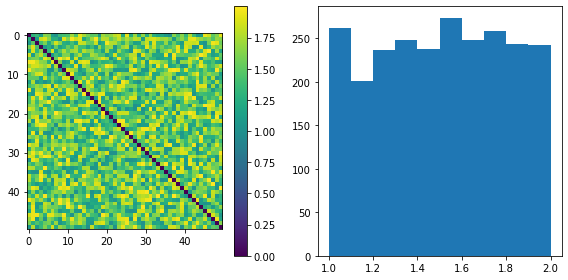

In [2]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(adj_mat)
plt.colorbar()
plt.subplot(122)
plt.hist(adj_mat[mask])
plt.tight_layout()

In [3]:
# Normalize by sum over incoming neighbors 
adj_mat /= adj_mat.sum(axis=0)

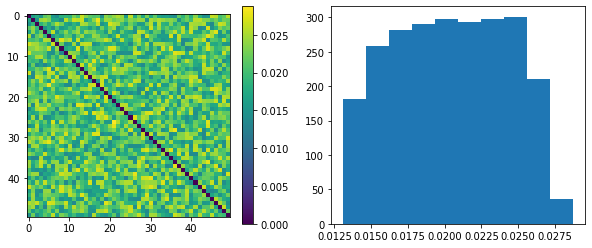

In [4]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(adj_mat)
plt.colorbar()
plt.subplot(122)
plt.hist(adj_mat[mask]);

In [52]:
# Instantiate SER model once, use as many times as we want 
model = SER(n_steps=500, prop_e=.1, prop_s=.4, threshold=.04, prob_recovery=.3, prob_spont_act=.001)
activity = model.run(adj_mat=adj_mat)

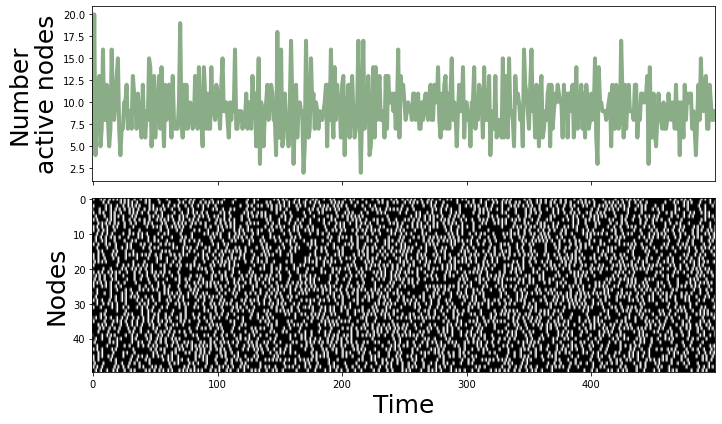

In [53]:
activity_only_active = activity.copy()
activity_only_active[activity == -1] = 0
n_active_nodes = activity_only_active.sum(axis=0)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)
ax1.plot(n_active_nodes, linewidth=4, color="#6D996A", alpha=.8)
ax1.set_ylabel("Number\nactive nodes", fontsize=25)
ax2.imshow(activity, cmap="binary_r")
ax2.set_xlabel("Time", fontsize=25)
ax2.set_ylabel("Nodes", fontsize=25)
ax2.set_aspect("auto")
ax2.grid(False)
fig.tight_layout()
fig.savefig("basic-example")